# Data Analysis Mathematics, Algorithms and Modeling project - Customer satisfication in hotel industry
### Team 7 - Members:
- **Tilvan Madalina**  - Student number: 9058215
- **Wesley Jayavanti** - Student number: 9019852
- **Yun-Chen Wang**    - Student number: 9040873

---

## Project
## AI prompt

* The role  of preparing good and bad questions in order to analyze the TripAdvisor dataset, when using an AI prompt is extremely significant to derive the correct and useful insights.
* Our objective is to explain the difference between good and bad research questions while analyzing user reviews and ratings. 
Well-researched questions lead to useful data while incorrectly formulated questions hinder analysis and provide irrelevant results. 

### Good Questions are Specific and  have Measurable outcomes

For example: "What is the average rating of hotels in Germany with at least 100 reviews?"
Reason It's Good: This question is specific (Germany hotels) and can be measured (average rating, reviews >= 100)

### Actionable (Provides insights that are useful in decision-making)
Features of a Bad Question :They are general, ambiguous, unfocussed  and difficult to analyze:
Example: "What do people think about hotels?"
Reason It’s Bad: It’s too vague and does not specify which aspect is being analyzed (like cost, location, services) and cannot be answered due to imprecise phrasing.

### Improving Bad Questions
Improved: "Which are the most frequently mentioned positive and negative reviews for 5-star rated hotels?"

### Conclusion
The basis of meaningful data analysis are good questions. Poorly constructed questions waste resources and impede understanding. However, by refining questions, decisions can be greatly improved.


## Project Description

### Findings:
[Inside the Rating Scores: A Multilevel Analysis of the Factors Influencing Customer Satisfaction in the Hotel Industry ](https://www.researchgate.net/publication/312164283_Inside_the_Rating_Scores_A_Multilevel_Analysis_of_the_Factors_Influencing_Customer_Satisfaction_in_the_Hotel_Industry) (Radojević, Stanisic & Stanić, 2017)

This research has a multilevel analysis of factors affecting customer satisfaction in hotel industry. Data from TripAdvisor.com, includes 13,410 hotels from 80 major destinations. 
<br> <br>
Relevant factors:
- visitor's nationality
- customer reviews
- country GDP
- Hofstede's variables:

    Shows how a society's culture influences its values, and how those values affect people's behavior.​
    * Power Distance Index (PDI): &emsp; How much people accept unequal power in a society.​
    * Individualism (IDV): &emsp; Shows if people care more about themselves or their group. ​
    * Motivation towards Achievement and Success (MAS): &emsp;Shows if a culture values success and competition (high MAS) or cooperation and quality of life (low MAS). ​
    * Uncertainty Avoidance Index (UAI): &emsp; Shows how much people dislike uncertainty or unknown situations. ​
    * Long-Term Orientation (LTO): &emsp; Shows if people focus on future goals (long-term) or quick results and traditions (short-term). ​
    * Indulgence vs. Restraint (IVR): &emsp; Shows if people enjoy life freely (indulgence) or follow strict rules (restraint).

### Focus:
1. Clarify the definition of customer satisfaction components
2. Use targeted questions addressing specific aspects of consumer experience
3. Rank factors in order of importance: *ex. room cleanliness, staff friendliness, location*
4. Review and refine research questions to match customer preferences changes and industry trends
5. Customer segment base - business vs. leisure travellers
6. Structured feedback - improve specific areas (1-10 scale)
7. Departments aligned with client satisfaction goalss

In [63]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from scipy.stats import boxcox
import statsmodels.formula.api as smf

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.stats.diagnostic import het_breuschpagan

In [4]:
# load dataset
path = "../dataset/The final data set (uncentered and unscaled variables).csv"
rating_df = pd.read_csv(path)
print(f"rating_df.shape: {rating_df.shape}")
rating_df.head() # print the first 5 rows of the dataset

rating_df.shape: (1048575, 80)


,Visitors_country_name,Destination_country_name,Hotel_id,Reviewer_id,Review_id,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,...,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
0,Afghanistan,Egypt,d302323,BEFE48CEC37A8BAC68FC5471B7D52A68,131620232,59,1,3,2.0,3.0,...,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Japan,d1115809,390FEEFF2C67C9ACC376C133F3E5AD9D,223296192,96,1,4,NaN,NaN,...,95,92,88,42,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Egypt,d300669,452C85191D400F6C83F249B4990CBD74,254401713,59,1,5,NaN,5.0,...,45,80,7,4,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,United Kingdom,d187989,B112C906DAA206F9F2EA9613526DCD3A,23343685,199,1,4,3.0,5.0,...,66,35,51,69,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Croatia,d601897,17552C71896B64C6EFCC959E1551F412,47403276,49,1,3,5.0,4.0,...,40,80,58,33,NaN,NaN,NaN,NaN,NaN,NaN


# Group Presentation 4 & Problem Analysis Workshop 4

### Part 1

Perform extensive cleanup and data source preparation by applying the dimensionality reduction techniques:
1. Missing Values Ratio 
2. Low Variance Filter 
3. High Correlation Filter 
4. Principal Components Analysis 
5. Backward/Forward Feature Elimination/Selection 

#### 1. Missing Values Ratio

In [5]:
# Display missing rates for all columns where the missing rate is greater than 0
sum_of_null_values = rating_df.isnull().sum() 
missing_values_rates = sum_of_null_values / len(rating_df)

# Get data types of columns with missing values
missing_values_filtered = missing_values_rates[missing_values_rates > 0]
missing_values_dtypes = rating_df.dtypes[missing_values_filtered.index]

# Combine missing rates and data types into a DataFrame
missing_values_info = pd.DataFrame({
    'Missing Rate': missing_values_filtered,
    'Data Type': missing_values_dtypes
})

display(missing_values_info)

,Missing Rate,Data Type
Location_rating,0.218514,float64
Cleanliness_rating,0.191268,float64
Rooms_rating,0.243522,float64
Service_rating,0.088906,float64
Sleepquality_rating,0.299191,float64
Value_rating,0.189676,float64
Date_of_review,0.088739,object
Trip_type,0.128007,object
Reviewer_rank,0.197214,object
Hotel.stars,0.021780,float64


In [6]:
# Create a dataframe to store cleaning dataset
clean_df = pd.DataFrame()

Filling missing values for numerical datas, and normalize all numerical datas.
- Input: rating_df
- Output: clean_df

In [7]:
pd.options.display.float_format = '{:.2f}'.format  # Adjust decimal places as needed
numeric_df = rating_df.select_dtypes(include=['number'])
skewness = numeric_df.skew()

SKEWNESS_THRESHOLD = 1 # 0.5

# Fill missing values
for col in numeric_df.columns:
    if abs(skewness[col]) > SKEWNESS_THRESHOLD: # Left or right Skewed
        clean_df[col] = numeric_df[col].fillna(numeric_df[col].median())
        # clean_df[col] = np.log1p(clean_df[col])
    else:  # Symetric
        clean_df[col] = numeric_df[col].fillna(numeric_df[col].mean())
        # clean_df[col] = scaler.fit_transform(clean_df[[col]])

print("Numerical features summary statistics:")
display(clean_df.describe())

print("\nFirst 5 rows for numerical features:")
display(clean_df.head())

Numerical features summary statistics:


,Review_id,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,...,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,...,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,160729088.33,112.83,49.13,4.03,4.49,4.41,3.96,4.10,4.11,3.97,...,52.24,60.36,52.12,48.65,51.09,61.58,54.53,63.03,47.51,53.76
std,64218748.84,62.21,28.60,1.03,0.81,0.91,0.92,1.02,0.85,0.96,...,18.26,24.98,19.66,17.43,18.98,21.53,11.40,19.26,21.74,15.53
min,694960.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,5.00,8.00,4.00,0.00,11.00,6.00,10.00,23.00,4.00,4.00
25%,123334875.50,68.00,21.00,4.00,4.00,4.00,3.96,4.00,4.00,4.00,...,42.00,35.00,32.00,33.00,36.00,46.00,49.00,48.00,24.00,40.00
50%,165726269.00,94.00,42.00,4.00,5.00,5.00,4.00,4.00,4.00,4.00,...,56.00,64.00,51.00,46.00,49.00,67.00,56.00,65.00,44.00,59.00
75%,209179749.50,178.00,74.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,66.00,85.00,63.00,65.00,68.00,76.00,61.00,81.00,63.00,68.00
max,278410891.00,209.00,94.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,100.00,100.00,100.00,100.00,95.00,90.00,88.00,100.00,87.00,89.00



First 5 rows for numerical features:


,Review_id,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,...,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr
0,131620232,59,1,3,2.00,3.00,3.00,3.00,3.00,4.00,...,45,80,7,4,51.09,61.58,54.53,63.03,47.51,53.76
1,223296192,96,1,4,5.00,5.00,3.96,5.00,4.00,5.00,...,95,92,88,42,51.09,61.58,54.53,63.03,47.51,53.76
2,254401713,59,1,5,5.00,5.00,3.96,5.00,5.00,4.00,...,45,80,7,4,51.09,61.58,54.53,63.03,47.51,53.76
3,23343685,199,1,4,3.00,5.00,4.00,5.00,4.00,4.00,...,66,35,51,69,51.09,61.58,54.53,63.03,47.51,53.76
4,47403276,49,1,3,5.00,4.00,3.00,5.00,4.00,5.00,...,40,80,58,33,51.09,61.58,54.53,63.03,47.51,53.76


In [8]:
## drop review_id column from numerical dataframe
clean_df = clean_df.drop(columns=['Review_id']) #,'Destination_country_id','Visitors_country_id'])

Fill missing values for object datatypes. <br>
- Input: rating_df
- Output: clean_df

Handle missing values `Trip_type`, and encode them by one-hot encoder(). 

In [9]:
# Handle missing values (filling values with unknows because we have a moderate amount of missing data - helps avoid bias and keeps data useful)
clean_df.loc[:, "Trip_type"] = rating_df["Trip_type"].fillna("unknown").copy()

In [10]:
"""
Create encoder with different sklearn version.
"""
def create_one_hot_encoder(_sparse=False):
    import sklearn
    print(f"sklearn.__version__:{sklearn.__version__}")
    
    # Convert version string to a tuple of integers for comparison
    sklearn_version = tuple(map(int, sklearn.__version__.split(".")))

    # One-hot encode 'Trip_type' with correct parameter based on scikit-learn version
    if sklearn_version >= (1, 2, 0):  # Version 1.2.0 or later
        _encoder = OneHotEncoder(sparse_output=_sparse)
    else:
        _encoder = OneHotEncoder(sparse=_sparse)
    return _encoder


In [11]:
encoded_df = clean_df.copy()

# One-hot encode 'Trip_type'
encoder = create_one_hot_encoder(_sparse=False) #OneHotEncoder(sparse_output=False)
trip_encoded = encoder.fit_transform(encoded_df[["Trip_type"]])

# Create DataFrame for encoded trip types
trip_encoded_df = pd.DataFrame(trip_encoded, columns=encoder.get_feature_names_out(["Trip_type"]))

# Concatenate encoded trip types with numerical features
encoded_df = pd.concat([encoded_df.drop(columns=["Trip_type"]), trip_encoded_df], axis=1)
display(encoded_df.head())

sklearn.__version__:1.6.1


,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Hotel.stars,...,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr,Trip_type_business,Trip_type_couple,Trip_type_family,Trip_type_friends,Trip_type_solo,Trip_type_unknown
0,59,1,3,2.00,3.00,3.00,3.00,3.00,4.00,5.00,...,54.53,63.03,47.51,53.76,1.00,0.00,0.00,0.00,0.00,0.00
1,96,1,4,5.00,5.00,3.96,5.00,4.00,5.00,3.00,...,54.53,63.03,47.51,53.76,0.00,0.00,1.00,0.00,0.00,0.00
2,59,1,5,5.00,5.00,3.96,5.00,5.00,4.00,5.00,...,54.53,63.03,47.51,53.76,1.00,0.00,0.00,0.00,0.00,0.00
3,199,1,4,3.00,5.00,4.00,5.00,4.00,4.00,5.00,...,54.53,63.03,47.51,53.76,0.00,0.00,0.00,0.00,1.00,0.00
4,49,1,3,5.00,4.00,3.00,5.00,4.00,5.00,3.77,...,54.53,63.03,47.51,53.76,0.00,0.00,0.00,0.00,1.00,0.00


Handle missing values in `Reviewer_rank` and encode them with label encoding.

In [12]:
# Fill with 'unknown'
clean_df.loc[:, "Reviewer_rank"] = rating_df["Reviewer_rank"].fillna("Unknown").copy()
encoded_df.loc[:, "Reviewer_rank"] = rating_df["Reviewer_rank"].fillna("Unknown").copy()

In [13]:
# Check unique values
encoded_df["Reviewer_rank"].unique()

array(['Reviewer', 'Top Contributor', 'Unknown', 'Senior Reviewer',
       'Senior Contributor', 'Contributor'], dtype=object)

In [14]:
# Perform Label encoding with a manually defined rank_order
rank_order = {
    'Unknown': 0,
    'Contributor': 1,
    'Senior Contributor': 2,
    'Reviewer': 3,
    'Senior Reviewer': 4,
    'Top Contributor': 5
}
# Apply the mapping
encoded_df["Reviewer_rank_encoded"] = encoded_df["Reviewer_rank"].map(rank_order)

# Apply the normalization
scaler = StandardScaler()
encoded_df["Reviewer_rank_scaled"] = scaler.fit_transform(encoded_df[["Reviewer_rank_encoded"]])

# Display a few rows to verify encoding
display(encoded_df[["Reviewer_rank", "Reviewer_rank_encoded", "Reviewer_rank_scaled"]].head())
encoded_df.drop(columns=["Reviewer_rank", "Reviewer_rank_encoded"], inplace=True)
encoded_df.rename(columns={"Reviewer_rank_scaled": "Reviewer_rank"}, inplace=True)

,Reviewer_rank,Reviewer_rank_encoded,Reviewer_rank_scaled
0,Reviewer,3,0.33
1,Top Contributor,5,1.45
2,Unknown,0,-1.36
3,Senior Reviewer,4,0.89
4,Senior Contributor,2,-0.23


Handle missing values in `Date_of_review` & convert dates into numeric values.

In [15]:
clean_df["Date_of_review"] = pd.to_datetime(rating_df["Date_of_review"], errors='coerce')


mode_date = clean_df['Date_of_review'].mode()[0]
clean_df['Date_of_review'] = clean_df['Date_of_review'].fillna(mode_date)
# median_date = clean_df['Date_of_review'].median()
# clean_df['Date_of_review'] = clean_df['Date_of_review'].fillna(median_date)

In [16]:
"""
Encode "Date_of_review" into "Days_Since_2000", missing valus are filled to 0.
"""

# Convert to datetime format
encoded_df["Date_of_review"] = pd.to_datetime(rating_df["Date_of_review"], errors='coerce')

# Define a reference date
reference_date = pd.to_datetime("2000-01-01")

# Convert to time difference in days (handling NaT values)
encoded_df["Days_Since_2000"] = (encoded_df["Date_of_review"] - reference_date).dt.days

# Handle missing values
# Option 1: Fill missing dates with 0 (assumes unknown dates = reference date)
encoded_df["Days_Since_2000"] = encoded_df["Days_Since_2000"].fillna(0)

# Option 2: Keep NaN for missing values (useful if missing data should remain unknown)

# Apply the normalization
scaler = StandardScaler()
encoded_df["Days_Since_2000_scaled"] = scaler.fit_transform(encoded_df[["Days_Since_2000"]])

# Display results
display(encoded_df[["Date_of_review", "Days_Since_2000", "Days_Since_2000_scaled"]].head())
encoded_df.drop(columns=["Date_of_review", "Days_Since_2000"], inplace=True)
encoded_df.rename(columns={"Days_Since_2000_scaled": "Date_of_review"}, inplace=True)

,Date_of_review,Days_Since_2000,Days_Since_2000_scaled
0,2012-06-09,4543.00,0.16
1,2014-08-21,5346.00,0.70
2,NaT,0.00,-2.88
3,2009-01-07,3294.00,-0.67
4,2009-10-21,3581.00,-0.48


In [17]:
encoded_df.head()

,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Hotel.stars,...,Visitors_country_lto,Visitors_country_ivr,Trip_type_business,Trip_type_couple,Trip_type_family,Trip_type_friends,Trip_type_solo,Trip_type_unknown,Reviewer_rank,Date_of_review
0,59,1,3,2.00,3.00,3.00,3.00,3.00,4.00,5.00,...,47.51,53.76,1.00,0.00,0.00,0.00,0.00,0.00,0.33,0.16
1,96,1,4,5.00,5.00,3.96,5.00,4.00,5.00,3.00,...,47.51,53.76,0.00,0.00,1.00,0.00,0.00,0.00,1.45,0.70
2,59,1,5,5.00,5.00,3.96,5.00,5.00,4.00,5.00,...,47.51,53.76,1.00,0.00,0.00,0.00,0.00,0.00,-1.36,-2.88
3,199,1,4,3.00,5.00,4.00,5.00,4.00,4.00,5.00,...,47.51,53.76,0.00,0.00,0.00,0.00,1.00,0.00,0.89,-0.67
4,49,1,3,5.00,4.00,3.00,5.00,4.00,5.00,3.77,...,47.51,53.76,0.00,0.00,0.00,0.00,1.00,0.00,-0.23,-0.48


In [18]:
# Check the difference bwteeen columns in clean_df and rating_df
clean_columns = set(encoded_df.columns)
rating_columns = set(rating_df.columns)

only_in_clean = clean_columns - rating_columns
only_in_rating = rating_columns - clean_columns

# Display results
print("Columns in clean_df but not in rating_df:", only_in_clean)
print("Columns in rating_df but notin  clean_df:", only_in_rating)

Columns in clean_df but not in rating_df: {'Trip_type_unknown', 'Trip_type_solo', 'Trip_type_business', 'Trip_type_friends', 'Trip_type_family', 'Trip_type_couple'}
Columns in rating_df but notin  clean_df: {'Review_id', 'Reviewer_id', 'Destination_country_name', 'Hotel_id', 'Visitors_country_name', 'Trip_type'}


In [19]:
# Check again if all columns in cleaned dataframe are numerical (int or float)
all_numeric = encoded_df.select_dtypes(include=['number']).shape[1] == encoded_df.shape[1]

# Print result
if all_numeric:
    print("All columns in encoded_df are numerical.")
else:
    print("Some columns are non-numerical.")
    
# Display non-numeric columns if they exist
non_numeric_cols = encoded_df.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) > 0:
    print("Non-numeric columns:", list(non_numeric_cols))


All columns in encoded_df are numerical.


##### Normalize all numerical features before dimension reduction

In [20]:
"""
Right Skewed(Skewness > 1) → Log Transformation (Compress the long tail)  
Left Skewed(Skewness < -1) → Log Transformation (Compress the long tail)  
Close to symetric(-1 ≤ Skewness ≤ 1) → Z-score Scaling(Keep in the same period) 
"""
numeric_df = encoded_df.select_dtypes(include=['number'])
numeric_df = numeric_df.drop(columns=['Reviewer_rank', 'Date_of_review'])
skewness = numeric_df.skew()

# Handle skewness and scaling
for col in numeric_df.columns:
    if abs(skewness[col]) > SKEWNESS_THRESHOLD:  # If skewed
        # Apply log transformation but check for non-positive values first
        if (encoded_df[col] == 0).any():  # Check for non-positive values
            # Replace zero or negative values with a small constant before log transformation
            encoded_df[col] = encoded_df[col].replace(0, 0.001)  # Small constant to avoid log(0)
        
        # Apply log transformation
        encoded_df[col] = np.log1p(encoded_df[col])
        
    else:  # symmetric
        encoded_df[[col]] = scaler.fit_transform(encoded_df[[col]])

# Display the first 5 rows after transformations
print("\nFirst 5 rows for numerical features:")
display(encoded_df.head())


First 5 rows for numerical features:


,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Hotel.stars,...,Visitors_country_lto,Visitors_country_ivr,Trip_type_business,Trip_type_couple,Trip_type_family,Trip_type_friends,Trip_type_solo,Trip_type_unknown,Reviewer_rank,Date_of_review
0,-0.87,-1.68,1.39,1.10,1.39,1.39,1.39,1.39,1.61,1.53,...,0.00,0.00,0.69,-0.73,0.00,0.00,0.00,0.00,0.33,0.16
1,-0.27,-1.68,1.61,1.79,1.79,1.60,1.79,1.61,1.79,-0.96,...,0.00,0.00,0.00,-0.73,0.69,0.00,0.00,0.00,1.45,0.70
2,-0.87,-1.68,1.79,1.79,1.79,1.60,1.79,1.79,1.61,1.53,...,0.00,0.00,0.69,-0.73,0.00,0.00,0.00,0.00,-1.36,-2.88
3,1.39,-1.68,1.61,1.39,1.79,1.61,1.79,1.61,1.61,1.53,...,0.00,0.00,0.00,-0.73,0.00,0.00,0.69,0.00,0.89,-0.67
4,-1.03,-1.68,1.39,1.79,1.61,1.39,1.79,1.61,1.79,0.00,...,0.00,0.00,0.00,-0.73,0.00,0.00,0.69,0.00,-0.23,-0.48


#### 2. Low Variance Filter
- Input: clean_df
- Output: lowv_filtered_df

In [21]:
# Select only numeric columns for variance filtering

# Apply Low Variance Filter (threshold = 0.01 to remove low variance features)
selector = VarianceThreshold(threshold=0.5)
filtered_data = selector.fit_transform(encoded_df)

filtered_variances = filtered_data.var()

# Get the selected feature names
selected_features = encoded_df.columns[selector.get_support()]

# Store the filtered features into a new DataFrame
lowv_filtered_df = pd.DataFrame(filtered_data, columns=selected_features)

# Count the number of remaining features after filtering
remaining_feature_count = len(selected_features)
removed_feature_count = encoded_df.shape[1] - remaining_feature_count

# Display results
print(f"Total Numeric Features Before Filtering: {encoded_df.shape[1]}")
print(f"Features Removed by Low Variance Filter: {removed_feature_count}")
print(f"Selected Features: {list(selected_features)}")
print()
print("The variances of remaining features")
print("-" * 50)
print (filtered_variances)
print(f"filtered_data-shape:{filtered_data.shape}")

# Display the first few rows of the filtered DataFrame
display(lowv_filtered_df.head())

Total Numeric Features Before Filtering: 80
Features Removed by Low Variance Filter: 42
Selected Features: ['Destination_country_id', 'Visitors_country_id', 'Hotel.stars', 'Hotel.noofrooms', 'Suites', 'Family.Rooms', 'Air.Conditioning', 'Self.Serve.Laundry', 'Business.Centre.with.Internet.Access', 'Meeting.Rooms', 'Banquet.Room', 'Babysitting', 'Dry.Cleaning', 'Multilingual.Staff', 'Free.Breakfast', 'Concierge', 'Public.Wifi', 'Fitness.Centre.with.Gym...Workout.Room', 'Pool', 'Wheelchair.access', 'Non.Smoking.Hotel', 'Destination_country_GDP', 'Visitors_country_GDP', 'Destination_country_pdi', 'Destination_country_idv', 'Destination_country_mas', 'Destination_country_uai', 'Destination_country_lto', 'Destination_country_ivr', 'Visitors_country_pdi', 'Visitors_country_idv', 'Visitors_country_mas', 'Visitors_country_uai', 'Visitors_country_lto', 'Visitors_country_ivr', 'Trip_type_couple', 'Reviewer_rank', 'Date_of_review']

The variances of remaining features
----------------------------

,Destination_country_id,Visitors_country_id,Hotel.stars,Hotel.noofrooms,Suites,Family.Rooms,Air.Conditioning,Self.Serve.Laundry,Business.Centre.with.Internet.Access,Meeting.Rooms,...,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr,Trip_type_couple,Reviewer_rank,Date_of_review
0,-0.87,-1.68,1.53,6.02,0.80,0.68,1.36,-0.94,0.66,0.65,...,-2.56,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.73,0.33,0.16
1,-0.27,-1.68,-0.96,5.53,-1.25,0.68,1.36,-0.94,-1.51,-1.55,...,-0.38,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.73,1.45,0.70
2,-0.87,-1.68,1.53,6.75,0.80,0.68,-0.74,1.06,0.66,0.65,...,-2.56,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.73,-1.36,-2.88
3,1.39,-1.68,1.53,5.37,0.80,0.68,-0.74,1.06,0.66,0.65,...,1.17,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.73,0.89,-0.67
4,-1.03,-1.68,0.00,3.91,-1.25,-1.46,1.36,-0.94,-1.51,-1.55,...,-0.90,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.73,-0.23,-0.48


Display heat map:
- Input: 'lowv_filtered_df'
- Output: None

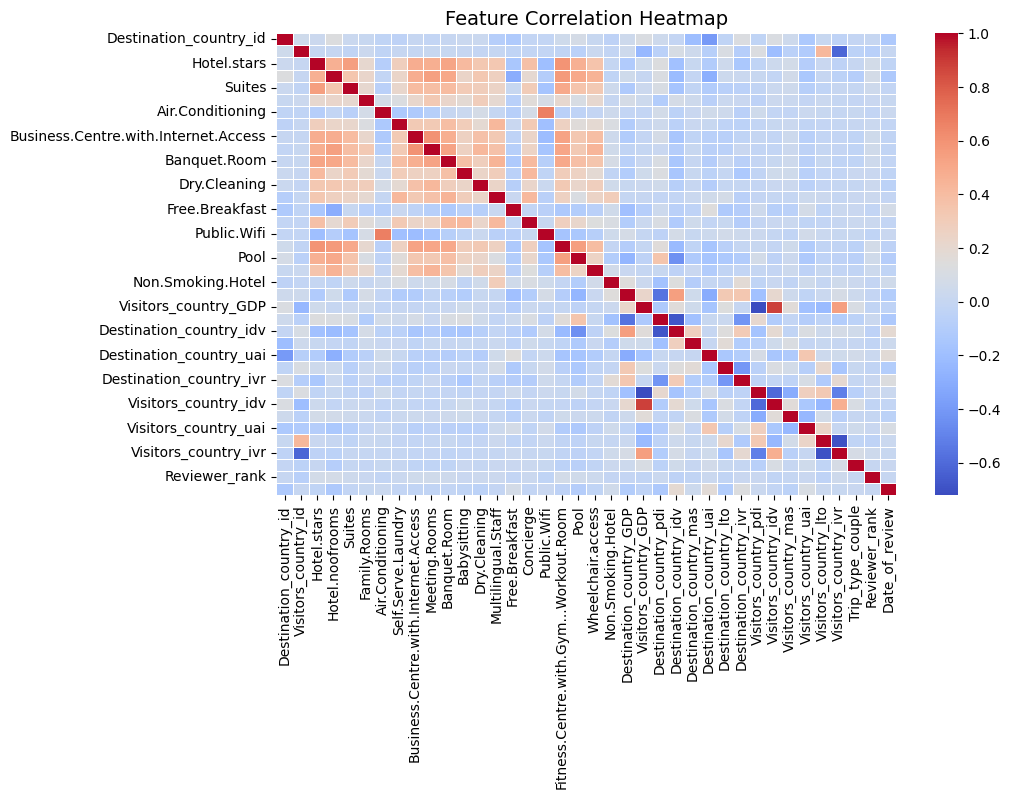

In [22]:
correlation_matrix = lowv_filtered_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, 
            # annot=True, 
            cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

#### 3. High Correlation Filter
- Input: lowv_filtered_df
- Output: highc_filtered_df

Features removed due to high correlation: ['Public.Wifi', 'Fitness.Centre.with.Gym...Workout.Room', 'Destination_country_idv', 'Visitors_country_idv', 'Visitors_country_ivr', 'Visitors_country_pdi', 'Meeting.Rooms', 'Banquet.Room', 'Destination_country_pdi', 'Suites', 'Pool']
Remaining features after filtering: ['Destination_country_id', 'Visitors_country_id', 'Hotel.stars', 'Hotel.noofrooms', 'Family.Rooms', 'Air.Conditioning', 'Self.Serve.Laundry', 'Business.Centre.with.Internet.Access', 'Babysitting', 'Dry.Cleaning', 'Multilingual.Staff', 'Free.Breakfast', 'Concierge', 'Wheelchair.access', 'Non.Smoking.Hotel', 'Destination_country_GDP', 'Visitors_country_GDP', 'Destination_country_mas', 'Destination_country_uai', 'Destination_country_lto', 'Destination_country_ivr', 'Visitors_country_mas', 'Visitors_country_uai', 'Visitors_country_lto', 'Trip_type_couple', 'Reviewer_rank', 'Date_of_review']
While choosing abs(threshold): 0.5, Remove cols: 11, remove rate: 0.2894736842105263
Shape of

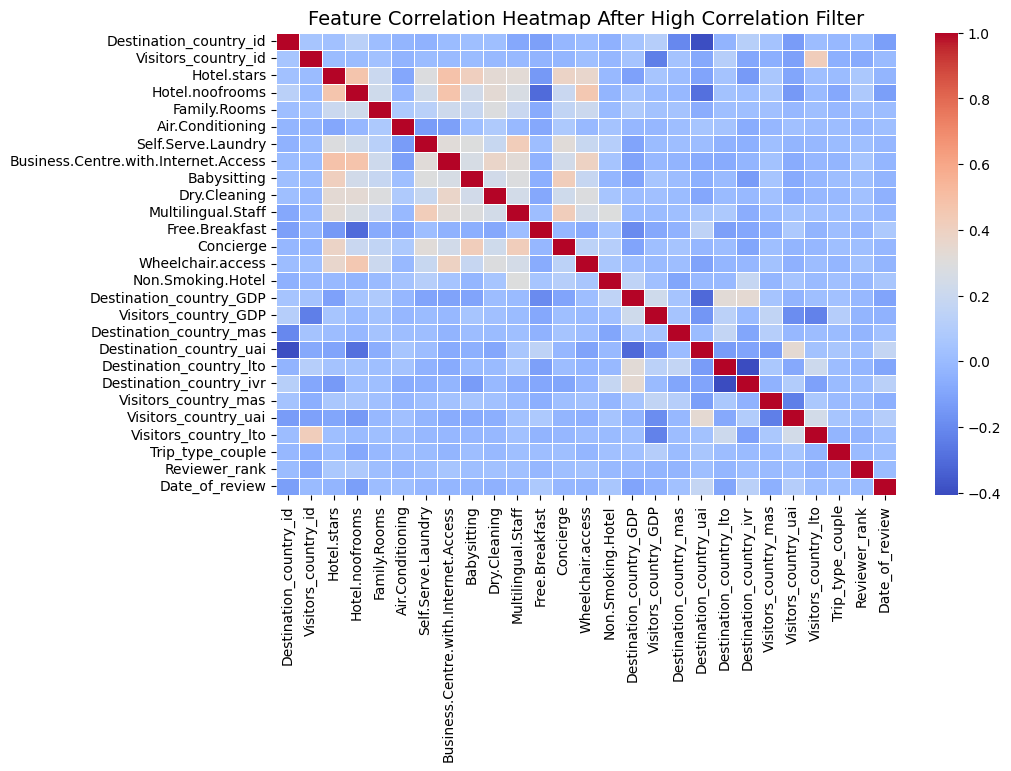

In [23]:
#Set correlation threshold (e.g., 0.9)
threshold = 0.5

# Identify highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Select only one feature from each highly correlated pair to remove
to_remove = set()
for column in upper_triangle.columns:
    high_corr_features = upper_triangle.index[upper_triangle[column].abs() > threshold].tolist()
    if high_corr_features:
        to_remove.add(column)  # Remove only one feature from each correlated pair

# Drop highly correlated features
highc_filtered_df = lowv_filtered_df.drop(columns=to_remove)

# Report the removed features
print("Features removed due to high correlation:", list(to_remove))
print("Remaining features after filtering:", highc_filtered_df.columns.tolist())

# Calculate the remove rate
remove_cols = (lowv_filtered_df.shape[1] - highc_filtered_df.shape[1])
remove_rate = (remove_cols) / lowv_filtered_df.shape[1]
print(f"While choosing abs(threshold): {threshold}, Remove cols: {remove_cols}, remove rate: {remove_rate}")

# Plot heatmap of remaining features
print(f"Shape of highc_filtered_df:{highc_filtered_df.shape}")
plt.figure(figsize=(10, 6))
sns.heatmap(highc_filtered_df.corr(), 
            # annot=True, 
            cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap After High Correlation Filter", fontsize=14)
plt.show()


#### 4. Principal Component Analysis (PCA)
- Input: clean_df
- Output: 

In [24]:
def perform_pca_analysis(_df: pd.DataFrame):
    _df = _df.select_dtypes(include=['number']).dropna()

    # Standardize the features (PCA is sensitive to scale)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(_df)

    # Apply PCA (keep all components)
    pca = PCA(n_components=len(_df.columns))
    pca.fit(scaled_features)

    # Get explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Find the minimum number of components that explain at least 90% variance
    num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  # +1 since index starts from 0

    # Plot explained variance
    plt.figure(figsize=(18, 8))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label="Explained Variance")
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label="Cumulative Explained Variance")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variance Explained')
    plt.title('Explained and Cumulative Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create a DataFrame to show explained variance
    explained_variance_df = pd.DataFrame({
        "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
        "Explained Variance Ratio": explained_variance,
        "Cumulative Variance": cumulative_variance
    })

    # Print explained variance DataFrame
    print("\nExplained Variance Analysis:")
    print(explained_variance_df)

    # Get PCA component vectors (eigenvectors)
    pca_components_df = pd.DataFrame(pca.components_, columns=_df.columns, index=[f"PC{i+1}" for i in range(len(_df.columns))])

    # Print PCA component vectors
    print("\nPCA Component Vectors (Eigenvectors):")
    print(pca_components_df)
    return num_components_90  # Return the number of components needed to explain at least 90% variance

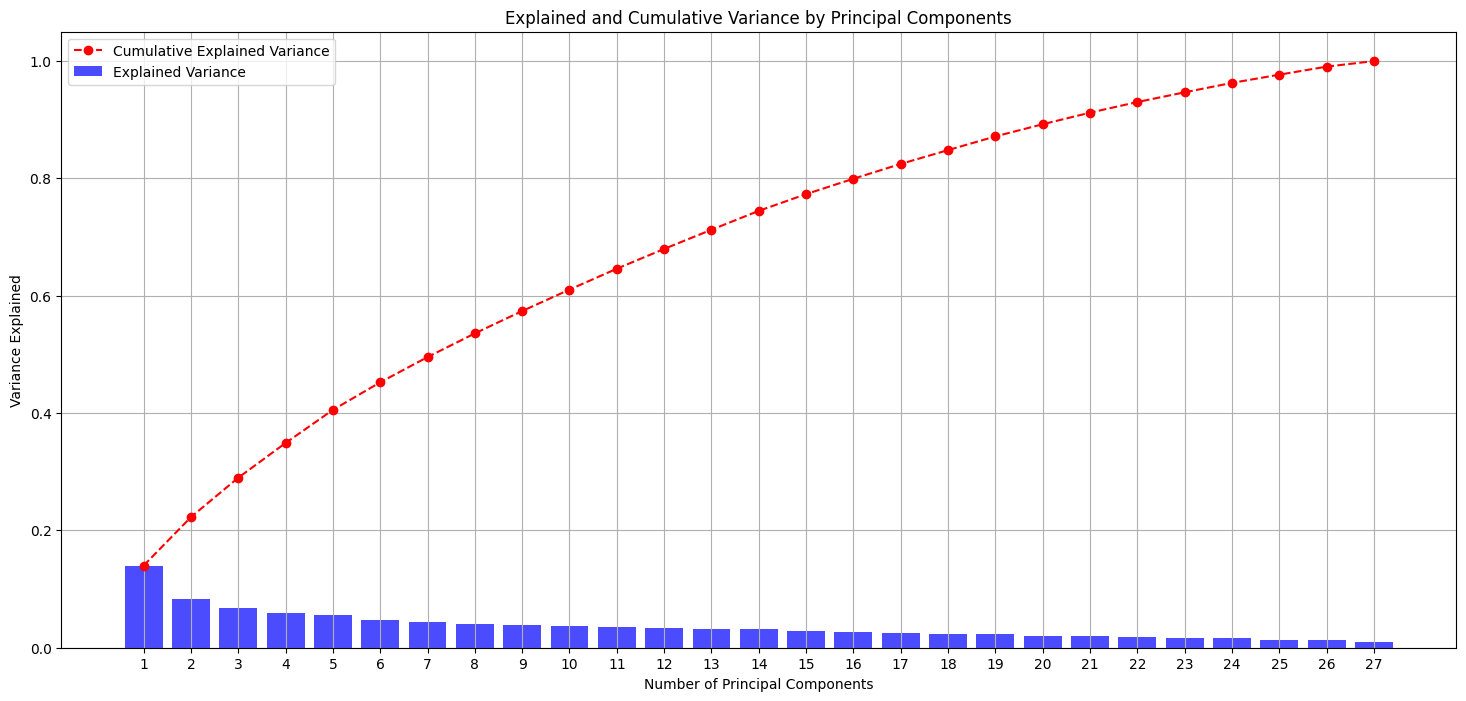


Explained Variance Analysis:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                      0.14                 0.14
1                  PC2                      0.08                 0.22
2                  PC3                      0.07                 0.29
3                  PC4                      0.06                 0.35
4                  PC5                      0.06                 0.41
5                  PC6                      0.05                 0.45
6                  PC7                      0.04                 0.50
7                  PC8                      0.04                 0.54
8                  PC9                      0.04                 0.57
9                 PC10                      0.04                 0.61
10                PC11                      0.04                 0.65
11                PC12                      0.03                 0.68
12                PC13                      0.03            

In [25]:
num_pcs = perform_pca_analysis(highc_filtered_df)
print(f"\nMinimum number of PCA components needed for 90% variance: {num_pcs}")

Perform PCA analysis using 'encoded_df', which is the cleaned dataframe without any missing values.

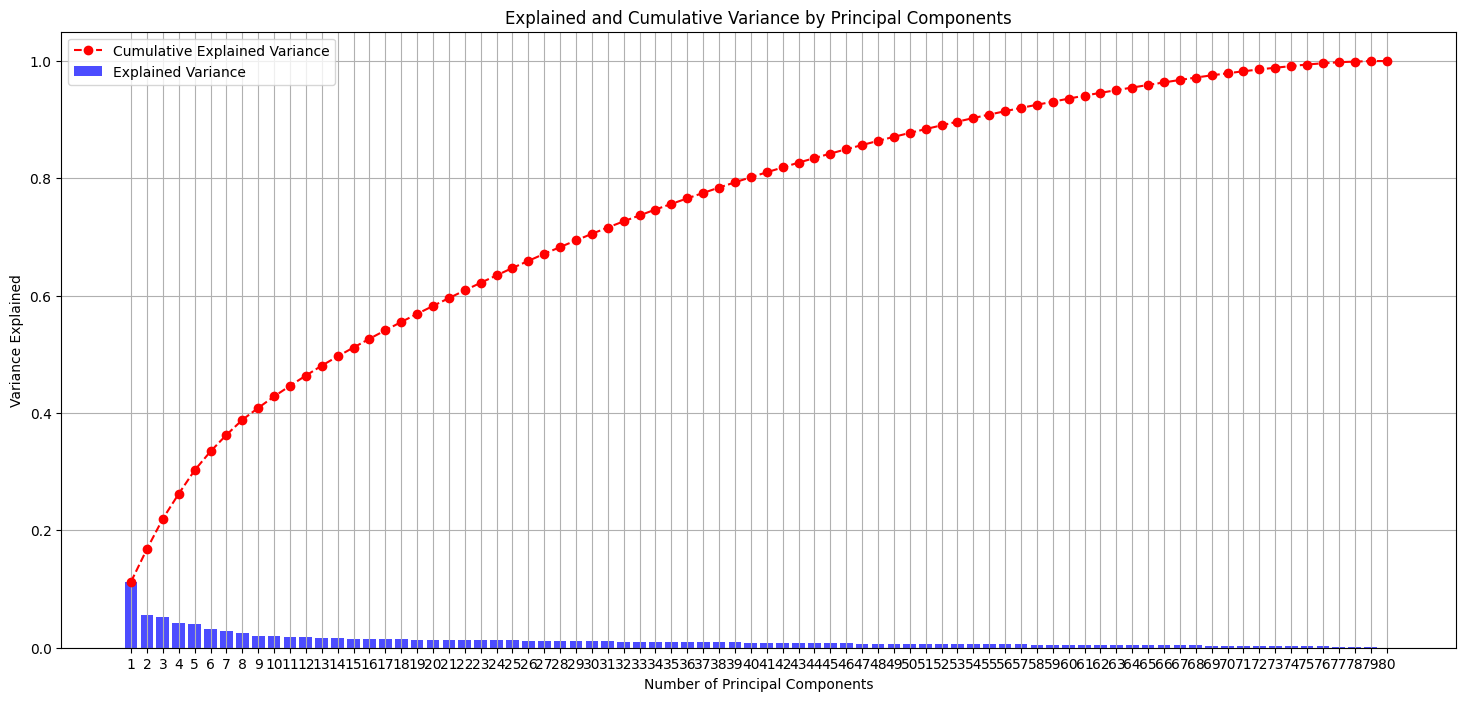


Explained Variance Analysis:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                      0.11                 0.11
1                  PC2                      0.06                 0.17
2                  PC3                      0.05                 0.22
3                  PC4                      0.04                 0.26
4                  PC5                      0.04                 0.30
..                 ...                       ...                  ...
75                PC76                      0.00                 1.00
76                PC77                      0.00                 1.00
77                PC78                      0.00                 1.00
78                PC79                      0.00                 1.00
79                PC80                      0.00                 1.00

[80 rows x 3 columns]

PCA Component Vectors (Eigenvectors):
      Destination_country_id  Visitors_country_id  Overall_rating  \

In [26]:
num_pcs = perform_pca_analysis(encoded_df)
print(f"\nMinimum number of PCA components needed for 90% variance: {num_pcs}")

#### 5. Backward/Forward Feature Elimination/Selection
While doing forward feature selection, we found seven features most important for our dataset.
In this part, we will try to remove these seven features from the dataset, and see how PCA analysis will be impacted.

Original encoded_df shape: (1048575, 80)
Reduced encoded_df shape after dropping highc_filtered_df columns: (1048575, 53)


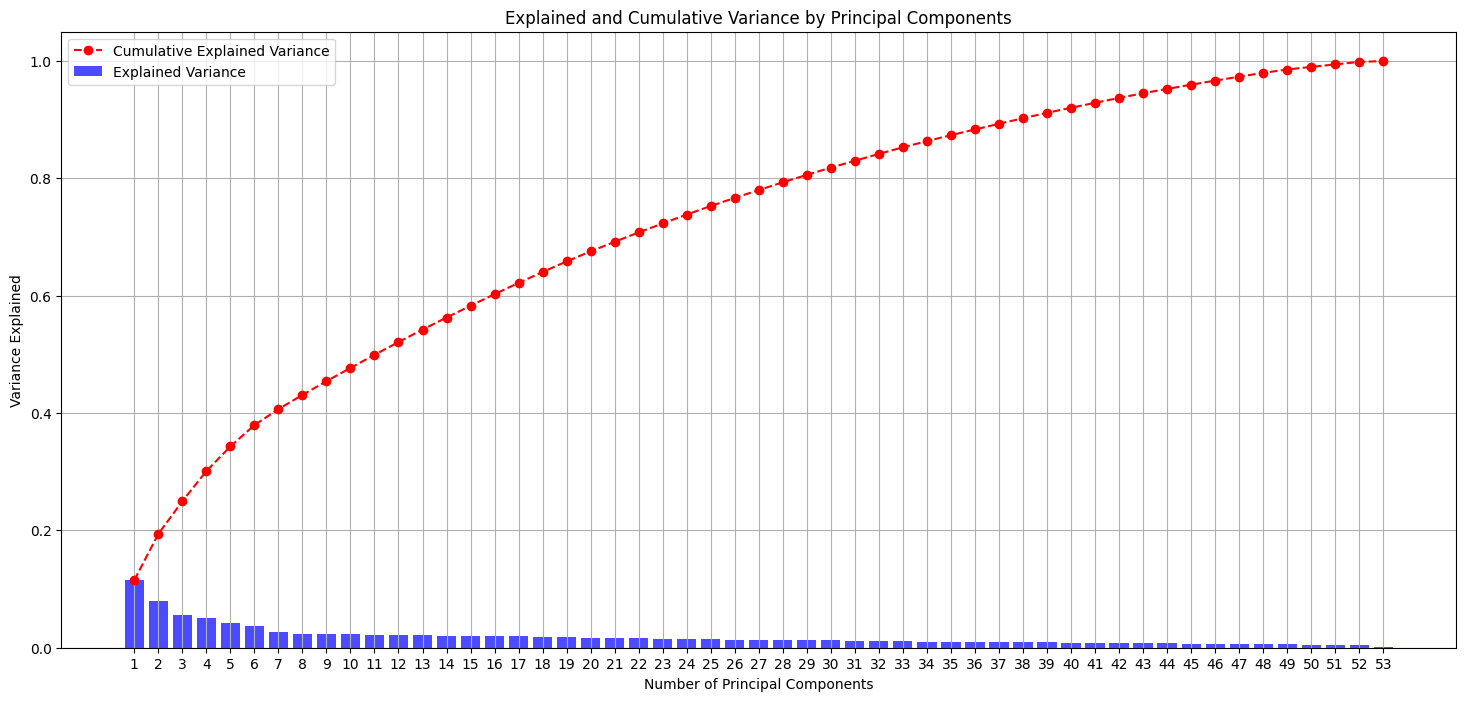


Explained Variance Analysis:
   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                      0.12                 0.12
1                  PC2                      0.08                 0.19
2                  PC3                      0.06                 0.25
3                  PC4                      0.05                 0.30
4                  PC5                      0.04                 0.34
5                  PC6                      0.04                 0.38
6                  PC7                      0.03                 0.41
7                  PC8                      0.02                 0.43
8                  PC9                      0.02                 0.45
9                 PC10                      0.02                 0.48
10                PC11                      0.02                 0.50
11                PC12                      0.02                 0.52
12                PC13                      0.02            

In [27]:
# Create a new DataFrame by dropping all columns in highc_filtered_df from clean_df
encoded_df_reduced = encoded_df.drop(columns=highc_filtered_df.columns, errors='ignore')

# Display the new DataFrame's shape
print(f"Original encoded_df shape: {encoded_df.shape}")
print(f"Reduced encoded_df shape after dropping highc_filtered_df columns: {encoded_df_reduced.shape}")

num_pcs_reduced = perform_pca_analysis(encoded_df_reduced)
print(f"\nMinimum number of PCA components needed for 90% variance (after removing highc_filtered_df columns): {num_pcs_reduced}")


Explanation: <br>
* After filtering columns by 'Low variance filter' and 'High Correlation Filter', we are left with `27` features:   <br>
    * Country id (same as the names): `Visitors_country_id`, `Destination_country_id`
    * Hotel features: `Hotel.stars`, `Hotel.noofrooms`
    * Services: `Family.Rooms`, `Air.Conditioning`, `Self.Serve.Laundry`, `Business.Centre.with.Internet.Access`, `Babysitting`, `Dry.Cleaning`, `Multilingual.Staff`, `Free.Breakfast`, `Concierge`, `Wheelchair.access`, `Non.Smoking.Hotel`
    * Destination country features: `Destination_country_GDP`, `Destination_country_mas`, `Destination_country_uai`, `Destination_country_lto`, `Destination_country_ivr`
    * Visitor country features: `Visitors_country_GDP`, `Visitors_country_mas`, `Visitors_country_uai`, `Visitors_country_lto`
    * Categorical features: `Trip_type_couple`, `Reviewer_rank`, `Date_of_review`

* While conducting PCA analusis for these `27` features, we need at least `21` PCA components to explain `90%` of variance for them.
* When performing PCA analysis on whole cleaned dataset, we need at least `54` PCA components to explain `90%` of variance.
* If we remove these 15 features from dataset, and run PCA again, we will still need `38` PCA components to explain `90%` of variance.


## Summary of Part 1:
1. The original dataset contains 1048575 rows of data with 80 features (70 of them are numeric) including some missing values.
2. The missing ratio are calculated for each feature. For numeric features, we imputed their values by mean or median based on th skewness, and for the catergorical features are filled in specific ways:
    - `Trip_type`: fill with 'unknown' and converted into one-hot encoding values (convert into 6 columns: Trip_type_business	Trip_type_couple, Trip_type_family, Trip_type_friends,Trip_type_solo, Trip_type_unknown)
    - `Reviewer_rank`: fill with 'unknown' and converted into label encoding values
    - `Date_of_review`: fill with 0 and converted into integers meaning "Days_Since_2000"
    Some other non-numeric features that are not cover yet in this experiment are: `Hotel_id`, `Reviewer_id`, `Visitors_country_name`, `Trip_type`, `Destination_country_name`
3. When selecting `threshold=0.5`, `42` columns are removed by Low Variance Filter, outputs `38` columns of dataset.
4. When selecting `threshold=0.5`, `11` columns are removed by High Correlation Filter, outputs `27` columns of dataset.
5. These `27` features seemed to be important for the dataset, since the number of necessary PCA components doesn't decrease obviously when we removed them from the dataset.
6. But also it is clear that our dataset is still complex, `54` components are required to explain 90% of variance. 

## Part 2
1. Random Forest Trees 
2. Converting factor variables to numeric 
3. Converting calendar dates to Julian 
4. Converting categorical values to dummies 
5. Performing Box-Cox transformations
6. Applying Tukey's Ladder

#### 1. Random Forest Trees

In [28]:
## Random Forest Trees
features = ['Destination_country_pdi','Destination_country_ivr','Destination_country_lto','Destination_country_uai', 'Destination_country_mas', 'Destination_country_idv', 
            'Destination_country_GDP','Hotel.noofrooms', 'Hotel.distance', 'Hotel.stars']
price_threshold = clean_df['Hotel.price'].median() 
clean_df['Satisfaction'] = clean_df['Hotel.price'].apply(lambda x: 1 if x >= price_threshold else 0)
X = clean_df[features] #select features based on importance
y = clean_df['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict using the model
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9126099706744868
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     96310
           1       0.94      0.90      0.92    113405

    accuracy                           0.91    209715
   macro avg       0.91      0.91      0.91    209715
weighted avg       0.91      0.91      0.91    209715



The model achieved an accuracy of 91.5%, indicating strong overall performance. For class 0, it demonstrated a precision of 89% and a recall of 93%, suggesting that while it correctly identifies most true positives, it occasionally misses some. Class 1 showed higher precision (94%) and recall (90%), indicating better identification of this class. The balanced f1-scores suggest that the model performs well in distinguishing between both classes. The macro and weighted averages further confirm the model's good ability to handle both classes effectively.

- Precision (How many of the predicted values were correct?)
- Recall (How well does the model find all instances of a given class?)
- F1-Score (Balance between Precision & Recall)
- The macro average calculates the unweighted mean of precision, recall, and F1-score across all classes. It treats each class equally, regardless of how many samples are in each class.
- The weighted average takes into account the number of samples (support) in each class. Instead of treating all classes equally, it gives more weight to the class that has more instances.

#### 2. Converting Factor Variables to Numeric

In [29]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 76 columns):
 #   Column                                         Non-Null Count    Dtype         
---  ------                                         --------------    -----         
 0   Destination_country_id                         1048575 non-null  int64         
 1   Visitors_country_id                            1048575 non-null  int64         
 2   Overall_rating                                 1048575 non-null  int64         
 3   Location_rating                                1048575 non-null  float64       
 4   Cleanliness_rating                             1048575 non-null  float64       
 5   Rooms_rating                                   1048575 non-null  float64       
 6   Service_rating                                 1048575 non-null  float64       
 7   Sleepquality_rating                            1048575 non-null  float64       
 8   Value_rating                    

In [30]:
num_features = ["Location_rating", "Cleanliness_rating", "Rooms_rating", "Service_rating", "Sleepquality_rating", "Value_rating", 
                "Hotel.stars", "Hotel.noofrooms", "Visitors_country_pdi", "Visitors_country_idv", "Visitors_country_mas", 
                "Visitors_country_uai", "Visitors_country_lto", "Visitors_country_ivr"]

for feature in num_features:
    clean_df[feature] = clean_df[feature].astype(int)

In [31]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 76 columns):
 #   Column                                         Non-Null Count    Dtype         
---  ------                                         --------------    -----         
 0   Destination_country_id                         1048575 non-null  int64         
 1   Visitors_country_id                            1048575 non-null  int64         
 2   Overall_rating                                 1048575 non-null  int64         
 3   Location_rating                                1048575 non-null  int64         
 4   Cleanliness_rating                             1048575 non-null  int64         
 5   Rooms_rating                                   1048575 non-null  int64         
 6   Service_rating                                 1048575 non-null  int64         
 7   Sleepquality_rating                            1048575 non-null  int64         
 8   Value_rating                    

#### 3. Converting Calendar Dates to Julian Dates

In [32]:
# Convert 'Date_of_review' to datetime format
clean_df['Date_of_review'] = pd.to_datetime(clean_df['Date_of_review'])

# Convert to Julian date
clean_df['Julian_date'] = clean_df['Date_of_review'].apply(
    lambda x: x.to_julian_date() if pd.notna(x) else 0  # Replace 0 with any default Julian date
)


In [33]:
clean_df[['Date_of_review','Julian_date']].value_counts()

Date_of_review  Julian_date
2014-09-01      2456901.50     94883
2013-09-03      2456538.50      1562
2014-05-27      2456804.50      1545
2014-09-02      2456902.50      1530
2013-09-04      2456539.50      1380
                               ...  
2004-02-04      2453039.50         1
2004-01-31      2453035.50         1
2004-01-24      2453028.50         1
2004-01-23      2453027.50         1
2015-05-15      2457157.50         1
Name: count, Length: 4270, dtype: int64

#### 4. Converting Categorical Variables to Dummies

In [34]:
clean_df = pd.get_dummies(clean_df, columns=['Trip_type', 'Reviewer_rank'], drop_first=True, dtype=int)
clean_df

,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Hotel.stars,...,Trip_type_couple,Trip_type_family,Trip_type_friends,Trip_type_solo,Trip_type_unknown,Reviewer_rank_Reviewer,Reviewer_rank_Senior Contributor,Reviewer_rank_Senior Reviewer,Reviewer_rank_Top Contributor,Reviewer_rank_Unknown
0,59,1,3,2,3,3,3,3,4,5,...,0,0,0,0,0,1,0,0,0,0
1,96,1,4,5,5,3,5,4,5,3,...,0,1,0,0,0,0,0,0,1,0
2,59,1,5,5,5,3,5,5,4,5,...,0,0,0,0,0,0,0,0,0,1
3,199,1,4,3,5,4,5,4,4,5,...,0,0,0,1,0,0,0,1,0,0
4,49,1,3,5,4,3,5,4,5,3,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,178,94,4,4,4,3,4,5,5,4,...,1,0,0,0,0,1,0,0,0,0
1048571,68,94,3,5,4,3,2,4,3,3,...,0,0,0,0,0,0,0,0,0,0
1048572,199,94,1,5,5,3,4,4,4,3,...,0,0,0,0,1,0,1,0,0,0
1048573,14,94,4,4,5,5,5,4,3,4,...,0,1,0,0,0,0,0,0,0,0


#### 5. Performing Box-Cox Transformations and Tukey's Ladder

- Box-Cox is used to normalize skewed numerical features. It only works on positive values.
- Tukey’s Ladder is an alternative to Box-Cox that works on negative and zero values.

In [35]:

def tukey_transform(df, skew_threshold=1):
    """
    Applies Tukey's Ladder of Powers transformations to numerical columns based on skewness.
    
    Parameters:
    - df (pd.DataFrame): The input dataframe with numerical features.
    - skew_threshold (float): The absolute skewness threshold beyond which transformations are applied.
    
    Returns:
    - pd.DataFrame: Transformed dataframe.
    - dict: Dictionary mapping columns to their chosen transformations.
    """
    
    transformed_df = df.copy()  # Make a copy to avoid modifying original data
    transformations = {}  # Store chosen transformation for each column
    
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    skewness = df[numeric_cols].skew()
    
    for col in numeric_cols:
        if df[col].nunique() > 2:
            if abs(skewness[col]) > skew_threshold:  # Only transform highly skewed columns
                min_val = df[col].min()
                
                if min_val <= 0:  # If any value is ≤ 0, shift values to make them positive
                    transformed_df[col] = df[col] - min_val + 1
                
                # Apply the best transformation based on skewness
                if skewness[col] > skew_threshold:  # Right-skewed (long right tail)
                    if min_val > 0:
                        transformed_df[col], _ = boxcox(df[col])  # Box-Cox for positive values
                        transformations[col] = "Box-Cox"
                    else:
                        transformed_df[col] = np.log1p(transformed_df[col])  # Log1p for zero/negative values
                        transformations[col] = "Log1p"
                
                elif skewness[col] < -skew_threshold:  # Left-skewed (long left tail)
                    transformed_df[col] = np.power(df[col], 2)  # Square transformation
                    transformations[col] = "Square"
    
    return transformed_df, transformations

In [68]:
clean_df['Overall_rating'].head()

0    3
1    4
2    5
3    4
4    3
Name: Overall_rating, dtype: int64

In [69]:
transformed_df['Overall_rating'].head()

0     9
1    16
2    25
3    16
4     9
Name: Overall_rating, dtype: int64

In [36]:
# Store the original column names in clean_df
original_columns = clean_df.columns

# clean_df.columns = clean_df.columns.str.replace('.', '')
# clean_df.columns = clean_df.columns.str.replace('_', '')

# Apply Tukey's Ladder transformations
transformed_df, transformations_used = tukey_transform(clean_df.drop(columns = ['Date_of_review']))

# Show which transformations were applied
print("Transformations applied to each column:")
display(transformations_used)

Transformations applied to each column:


{'Overall_rating': 'Square',
 'Location_rating': 'Square',
 'Cleanliness_rating': 'Square',
 'Service_rating': 'Square',
 'Sleepquality_rating': 'Square',
 'Value_rating': 'Square',
 'Hotel.price': 'Box-Cox',
 'Hotel.distance': 'Log1p',
 'Hotel.noofrooms': 'Box-Cox',
 'Julian_date': 'Square'}

In [37]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

# Calculate skewness before and after transformation
skew_before = clean_df.drop(columns=['Date_of_review']).skew()  # Skewness before transformation
skew_after = transformed_df.skew()  # Skewness after transformation

# Create a DataFrame combining the two results
skewness_df = pd.DataFrame({
    'Skewness Before': skew_before,
    'Skewness After': skew_after
})

# Filter the columns where skewness values before and after are different (i.e., modified columns)
modified_columns = skewness_df[skewness_df['Skewness Before'] != skewness_df['Skewness After']]

print("\nSkewness Before and After Transformation:")
display(skewness_df)

# Display the resulting DataFrame with only the modified columns
print("\nSkewness Before and After Transformation (Modified Columns Only):")
display(modified_columns)


Skewness Before and After Transformation:


,Skewness Before,Skewness After
Destination_country_id,0.05,0.05
Visitors_country_id,0.05,0.05
Overall_rating,-1.13,-0.48
Location_rating,-1.77,-1.24
Cleanliness_rating,-1.77,-1.17
Rooms_rating,-0.35,-0.35
Service_rating,-1.28,-0.62
Sleepquality_rating,-1.36,-0.45
Value_rating,-1.15,-0.37
Hotel.stars,-0.15,-0.15



Skewness Before and After Transformation (Modified Columns Only):


,Skewness Before,Skewness After
Overall_rating,-1.13,-0.48
Location_rating,-1.77,-1.24
Cleanliness_rating,-1.77,-1.17
Service_rating,-1.28,-0.62
Sleepquality_rating,-1.36,-0.45
Value_rating,-1.15,-0.37
Hotel.price,2.15,0.01
Hotel.distance,30.34,0.85
Hotel.noofrooms,4.12,-0.02
Julian_date,-1.41,-1.41


## Summary of Part 2:

- The negative skewness of `Overall_rating`, `Location_rating`, `Cleanliness_rating`, `Service_rating`, `Sleepquality_rating`, `Value_rating`, and `Julian_date` was significantly reduced.
- The right-skewed features `Hotel.price`, `Hotel.distance`, `Hotel.noofrooms` were normalized, making them more suitable for analysis.

Key Observations:
- **Skewness reduction was effective**: Most transformed features showed a significant reduction in skewness, bringing them closer to a normal distribution.
- **Categorical variables remained unchanged**: Features like `Reviewer_rank_Reviewer` and `Trip_type_solo` still have skewness since transformations were only applied to numerical variables.
- Square transformation worked well for negatively skewed data, while Box-Cox and Log1p effectively handled right-skewed variables.

## Part 3

1. Perform SLR and MLR methods and analyze the results
2. Present a summary of the MLR performed to the data set in a 50-word summary in a markdown cell.

In [100]:
# Display the first few rows and columns info
transformed_df.head()

,Destination_country_id,Visitors_country_id,Overall_rating,Location_rating,Cleanliness_rating,Rooms_rating,Service_rating,Sleepquality_rating,Value_rating,Hotelstars,Hotelprice,Hoteldistance,Hotelnoofrooms,Suites,FamilyRooms,Microwave,AirConditioning,Minibar,Refrigeratorinroom,BarLounge,Kitchenette,FreeParking,SelfServeLaundry,BusinessCentrewithInternetAccess,ConferenceFacilities,MeetingRooms,BanquetRoom,CasinoandGambling,Babysitting,DryCleaning,MultilingualStaff,AirportTransportation,FreeBreakfast,ChildrenActivitiesKidFamilyFriendly,LaundryService,Concierge,RoomService,Restaurant,ShuttleBusService,FreeInternet,FreeHighSpeedInternetWiFi,PaidWifi,PaidInternet,PublicWifi,SkiInSkiOut,FitnessCentrewithGymWorkoutRoom,Spa,TennisCourt,HotTub,Pool,Golfcourse,Beach,Wheelchairaccess,Reducedmobilityrooms,NonSmokingHotel,NonSmokingRooms,Smokingroomsavailable,PetsAllowedDogPetFriendly,Destination_country_GDP,Visitors_country_GDP,Destination_country_pdi,Destination_country_idv,Destination_country_mas,Destination_country_uai,Destination_country_lto,Destination_country_ivr,Visitors_country_pdi,Visitors_country_idv,Visitors_country_mas,Visitors_country_uai,Visitors_country_lto,Visitors_country_ivr,Satisfaction,Julian_date,Trip_type_couple,Trip_type_family,Trip_type_friends,Trip_type_solo,Trip_type_unknown,Reviewer_rank_Reviewer,Reviewer_rank_Senior_Contributor,Reviewer_rank_Senior_Reviewer,Reviewer_rank_Top_Contributor,Reviewer_rank_Unknown
0,59,1,9,4,9,3,9,9,16,5,6.77,2.31,8.69,1,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,3314.50,664.80,70,25,45,80,7,4,51,61,54,63,47,53,1,6032365807656.25,0,0,0,0,0,1,0,0,0,0
1,96,1,16,25,25,3,25,16,25,3,5.95,1.94,7.73,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,38633.70,664.80,54,46,95,92,88,42,51,61,54,63,47,53,0,6036310928990.25,0,1,0,0,0,0,0,0,1,0
2,59,1,25,25,25,3,25,25,16,5,7.10,1.14,10.23,1,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,1,3314.50,664.80,70,25,45,80,7,4,51,61,54,63,47,53,1,6036364980702.25,0,0,0,0,0,0,0,0,0,1
3,199,1,16,9,25,4,25,16,16,5,9.64,1.87,7.44,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,41781.10,664.80,35,89,66,35,51,69,51,61,54,63,47,53,1,6026232061082.25,0,0,0,1,0,0,0,1,0,0
4,49,1,9,25,16,3,25,16,25,3,5.62,1.41,4.92,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13597.90,664.80,73,33,40,80,58,33,51,61,54,63,47,53,0,6027641220750.25,0,0,0,1,0,0,1,0,0,0


In [101]:
transformed_df.columns

Index(['Destination_country_id', 'Visitors_country_id', 'Overall_rating',
       'Location_rating', 'Cleanliness_rating', 'Rooms_rating',
       'Service_rating', 'Sleepquality_rating', 'Value_rating', 'Hotelstars',
       'Hotelprice', 'Hoteldistance', 'Hotelnoofrooms', 'Suites',
       'FamilyRooms', 'Microwave', 'AirConditioning', 'Minibar',
       'Refrigeratorinroom', 'BarLounge', 'Kitchenette', 'FreeParking',
       'SelfServeLaundry', 'BusinessCentrewithInternetAccess',
       'ConferenceFacilities', 'MeetingRooms', 'BanquetRoom',
       'CasinoandGambling', 'Babysitting', 'DryCleaning', 'MultilingualStaff',
       'AirportTransportation', 'FreeBreakfast',
       'ChildrenActivitiesKidFamilyFriendly', 'LaundryService', 'Concierge',
       'RoomService', 'Restaurant', 'ShuttleBusService', 'FreeInternet',
       'FreeHighSpeedInternetWiFi', 'PaidWifi', 'PaidInternet', 'PublicWifi',
       'SkiInSkiOut', 'FitnessCentrewithGymWorkoutRoom', 'Spa', 'TennisCourt',
       'HotTub', 'Poo

In [102]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 84 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Destination_country_id               1048575 non-null  int64  
 1   Visitors_country_id                  1048575 non-null  int64  
 2   Overall_rating                       1048575 non-null  int64  
 3   Location_rating                      1048575 non-null  int64  
 4   Cleanliness_rating                   1048575 non-null  int64  
 5   Rooms_rating                         1048575 non-null  int64  
 6   Service_rating                       1048575 non-null  int64  
 7   Sleepquality_rating                  1048575 non-null  int64  
 8   Value_rating                         1048575 non-null  int64  
 9   Hotelstars                           1048575 non-null  int64  
 10  Hotelprice                           1048575 non-null  float64
 11

#### 1. Simple Linear Regression (SLR)

In [103]:
# Clean column names by replacing invalid characters
transformed_df = transformed_df.rename(columns={'Reviewer_rank_Top Contributor': 'Reviewer_rank_Top_Contributor'})
transformed_df = transformed_df.rename(columns={'Reviewer_rank_Senior Reviewer': 'Reviewer_rank_Senior_Reviewer'})
transformed_df = transformed_df.rename(columns={'Reviewer_rank_Senior Contributor': 'Reviewer_rank_Senior_Contributor'})

transformed_df.columns = transformed_df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Removes non-alphanumeric characters

In [104]:
# --- Simple Linear Regression (SLR) ---
target = 'Overall_rating'
predictor_slr = 'Service_rating'

formula_slr = f"{target} ~ {predictor_slr}"
model_slr = smf.ols(formula=formula_slr, data=clean_df).fit()
# model_slr = smf.ols(formula=formula_slr, data=transformed_df).fit()
print("\nSLR Model Summary:")
print(model_slr.summary())


SLR Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Overall_rating   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                 1.311e+06
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:13:19   Log-Likelihood:            -1.0924e+06
No. Observations:             1048575   AIC:                         2.185e+06
Df Residuals:                 1048573   BIC:                         2.185e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.931

Note: <br>
R-squared = 0.556 means that the independent variable Service_rating explains approximately 55.6% of the variance in the target variable Overall_rating. <br>
This indicates a moderate level of explanatory power, suggesting that there is room for improvement in the model—possibly by including additional variables to better capture the remaining variance.

/Users/wangyunchen/miniforge3/envs/da_py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


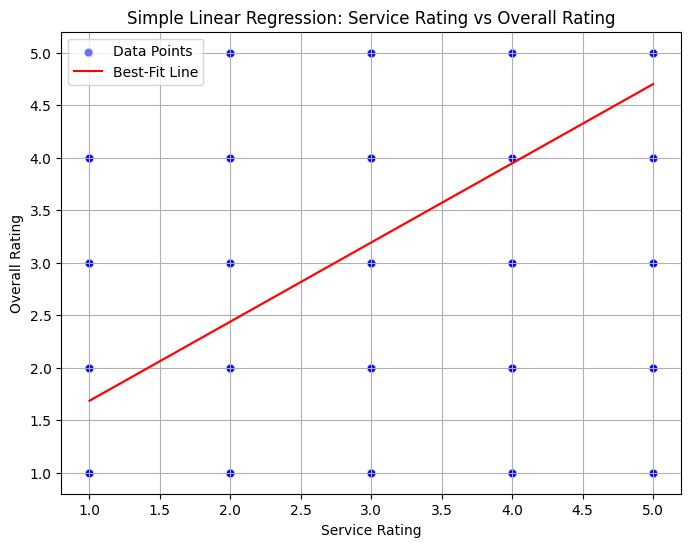

In [105]:
# Plot for SLR
X = clean_df['Service_rating'] # transformed_df['Service_rating']
y = clean_df['Overall_rating'] # transformed_df['Overall_rating']

y_pred = model_slr.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, color='blue', alpha=0.5, label='Data Points')
sns.lineplot(x=X, y=y_pred, color='red', label='Best-Fit Line')

plt.xlabel('Service Rating')
plt.ylabel('Overall Rating')
plt.title('Simple Linear Regression: Service Rating vs Overall Rating')
plt.legend()
plt.grid(True)
plt.show()

- Homoscedasticity analsis for the SLR restuls

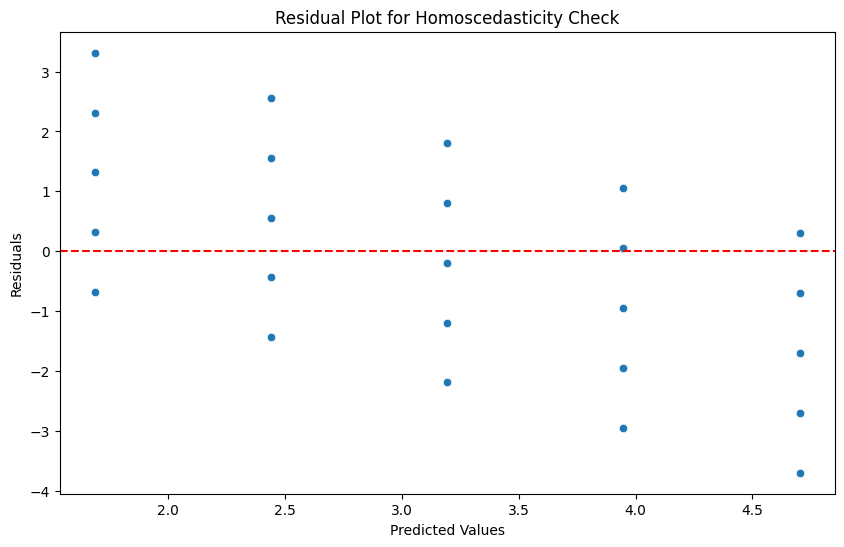

In [106]:
# Homoscedasticity
predicted_values = model_slr.fittedvalues
residuals = model_slr.resid

# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)#ß, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

Note: <br>
The residual plot shows signs of non-constant variance, with residuals appearing more spread out at the lower and higher ends of the predicted values.

In [107]:
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

# Get residuals and input variables (exogenous variables)
residuals = model_slr.resid
exog = model_slr.model.exog

# Run the Breusch-Pagan test for homoscedasticity
bp_test = het_breuschpagan(residuals, exog)

# Organize the test result with labels
bp_labels = ['Lagrange Multiplier statistic', 'p-value (LM)', 'F-statistic', 'p-value (F)']
bp_results = pd.Series(bp_test, index=bp_labels)

# Print the test results
print("Breusch-Pagan Test for Homoscedasticity:\n")
print(bp_results)

# Interpret the p-value result
print("\nInterpretation:")
if bp_results['p-value (LM)'] > 0.05:
    print("p-value > 0.05: No significant evidence of heteroscedasticity. The homoscedasticity assumption is likely satisfied.")
else:
    print("p-value ≤ 0.05: Evidence of heteroscedasticity detected. The homoscedasticity assumption may be violated.")


Breusch-Pagan Test for Homoscedasticity:

Lagrange Multiplier statistic   18449.65
p-value (LM)                        0.00
F-statistic                     18780.05
p-value (F)                         0.00
dtype: float64

Interpretation:
p-value ≤ 0.05: Evidence of heteroscedasticity detected. The homoscedasticity assumption may be violated.


Note: <br>
Based on the Breusch-Pagan test, which returns a p-value of 0.00, we have statistically significant evidence of **heteroscedasticity**. This means the assumption of **homoscedasticity** is violated in this simple linear regression model.

The residual plot also shows a **slight funnel shape**, suggesting that the variance of residuals is not constant across the predicted values, which supports the test result.

#### 2. Multiple Linear Regression (MLR)

In [108]:
# Select numerical columns (excluding 'Overall_rating')
predictors = [col for col in transformed_df.select_dtypes(include=['number']).columns if col != 'Overall_rating']

# Create the formula for the model
formula_mlr = "Overall_rating ~ " + " + ".join(predictors)

# Fit the model
model_mlr = smf.ols(formula=formula_mlr, data=transformed_df).fit()

# Print the model summary
print("\nMLR Model Summary:")
print(model_mlr.summary())


MLR Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Overall_rating   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                 2.690e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:13:57   Log-Likelihood:            -2.9752e+06
No. Observations:             1048575   AIC:                         5.951e+06
Df Residuals:                 1048494   BIC:                         5.952e+06
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Summary of Part 3:

- Several variables, including service quality, food, and ambience, contributed positively to the model, with statistical significance at p < 0.05. The model achieved an R² value indicating moderate
fit, and diagnostic tests confirmed linearity, homoscedasticity, and minimal multicollinearity.
- MLR: Multiple Linear Regression (MLR) analysis on the Trip Advisor dataset revealed significant predictors influencing overall ratings. This OLS regression summary shows that the model predicts Overall_rating with an R-squared of 0.795, meaning it explains 79.5% of variance. The F-statistic (2.769e+04, p=0.00) confirms strong model significance. 72 predictors were used, with 514,627 observations. AIC and BIC indicate model fit complexity.
- SLR: This OLS regression model predicts Overall_rating but has a very low R-squared (0.006), meaning it explains only 0.6% of the variance in the dependent variable. The F-statistic (71.86, p=0.00) suggests the model is statistically significant, but its predictive power is weak. The dataset includes 1,048,575 observations with 93 predictors (Df Model = 93).

# Group Presentation 5

## Simple Linear Regression (SLR)

### Hypothesis Assumptions for Homoscedasticity:

- **Null hypothesis (H₀):** The residuals of the regression model have constant variance (homoscedasticity).  
- **Alternative hypothesis (H₁):** The residuals of the regression model have non-constant variance (heteroscedasticity).  

**Decision Rule:**  
If the p-value ≤ 0.05, we reject the null hypothesis and conclude that heteroscedasticity may be present.

In [109]:
# Extract significant predictors from the MLR model
significant_columns = model_mlr.pvalues[model_mlr.pvalues < 0.05].index.tolist()

Checking to see if we can find a higher r-squared regression model using the same target.

In [110]:
target = "Overall_rating"
models_list = []

for predictor in significant_columns:
    formula_slr = f"{target} ~ {predictor}"
    model = smf.ols(formula=formula_slr, data=transformed_df).fit()

    if model.rsquared > 0.2:
        models_list.append(model)

In [111]:
for model in models_list:
    print("\nSLR Model Summary:")
    print(model.summary())


SLR Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Overall_rating   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                 5.918e+05
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:14:08   Log-Likelihood:            -3.3257e+06
No. Observations:             1048575   AIC:                         6.651e+06
Df Residuals:                 1048573   BIC:                         6.651e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

Now we're trying to check all the relationships between all significant columns to see if we can find a better model.

*This code takes 25 minutes to run.*

In [47]:
current_r2 = model_slr.rsquared
best_models = []

for target in significant_columns:
    for predictor in significant_columns:
        if target != predictor:
            formula = f"{target} ~ {predictor}"
            model = smf.ols(formula=formula, data=transformed_df).fit()

            if model.rsquared > current_r2 and model.rsquared < 1:
                best_models.append((target, predictor, model.rsquared, model))

# Sort models by R-squared (descending order)
best_models.sort(key=lambda x: x[2], reverse=True)

# Display the best models
if best_models:
    print(f"\nTop {min(5, len(best_models))} Better Models Found:")
    for i, (target, predictor, r2, model) in enumerate(best_models[:5]):
        print(f"{i+1}. {target} ~ {predictor} | R² = {r2:.3f}")
        print(model.summary())


Top 5 Better Models Found:
1. PaidInternet ~ PaidWifi | R² = 0.843
                            OLS Regression Results                            
Dep. Variable:           PaidInternet   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.637e+06
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:45:41   Log-Likelihood:             3.6566e+05
No. Observations:             1048575   AIC:                        -7.313e+05
Df Residuals:                 1048573   BIC:                        -7.313e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [112]:
## printing the best regression model
best_target = 'Visitors_country_GDP '
best_predictor = 'Visitors_country_idv'

best_formula = f"{best_target} ~ {best_predictor}"
best_model = smf.ols(formula=best_formula, data=transformed_df).fit()
print("\nSLR Best model summary:")
print(best_model.summary())


SLR Best model summary:
                             OLS Regression Results                             
Dep. Variable:     Visitors_country_GDP   R-squared:                       0.779
Model:                              OLS   Adj. R-squared:                  0.779
Method:                   Least Squares   F-statistic:                 3.695e+06
Date:                  Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                          20:14:25   Log-Likelihood:            -1.1182e+07
No. Observations:               1048575   AIC:                         2.236e+07
Df Residuals:                   1048573   BIC:                         2.236e+07
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

- Plot the potential relationships

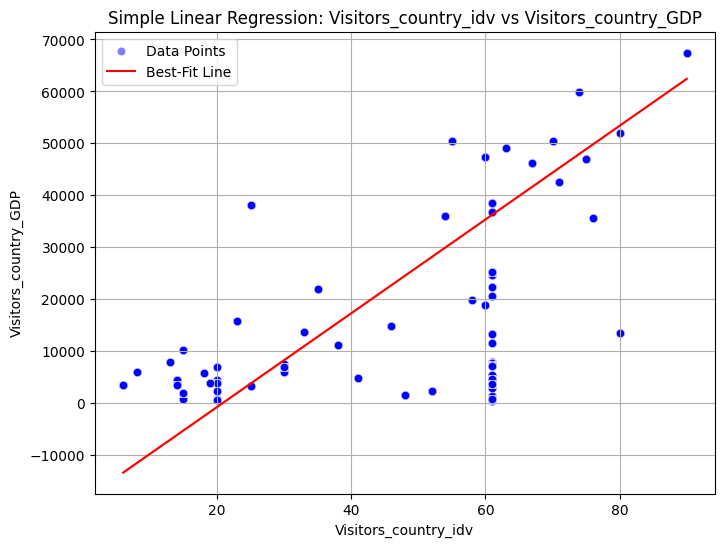

In [113]:
# Plot for SLR
X = transformed_df['Visitors_country_idv'] # clean_df['Visitors_country_GDP']
y = transformed_df['Visitors_country_GDP'] # clean_df['Visitors_country_idv']

y_pred = best_model.fittedvalues

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X, y=y, color='blue', alpha=0.5, label='Data Points')
sns.lineplot(x=X, y=y_pred, color='red', label='Best-Fit Line')

plt.xlabel('Visitors_country_idv')
plt.ylabel('Visitors_country_GDP')
plt.title('Simple Linear Regression: Visitors_country_idv vs Visitors_country_GDP')
plt.legend()
plt.grid(True)
plt.show()

- Homoscedasticity analsis for the SLR restuls

In [ ]:
"""
This code checks for homoscedasticity (constant variance of residuals) in a regression model using two methods: 
a residual plot and the Breusch-Pagan test.
These functions help diagnose model reliability and guide necessary corrections.
"""
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

def homoscedasticity_plot(_model):
    """
    Plots residuals vs. predicted values to visually inspect homoscedasticity.

    A random spread around zero suggests homoscedasticity, while patterns indicate heteroscedasticity.
    """
    # Homoscedasticity
    predicted_values = _model.fittedvalues
    residuals = _model.resid

    # Residual Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predicted_values, y=residuals)#ß, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot for Homoscedasticity Check')
    plt.show()
    return

def breusch_pagan_test(_model):
    """
    Uses the Breusch-Pagan test to statistically detect heteroscedasticity.

    Outputs a p-value, where p > 0.05 suggests no heteroscedasticity (assumption holds), and p ≤ 0.05 indicates heteroscedasticity (violated assumption).
    """
    # Get residuals and input variables (exogenous variables)
    residuals = _model.resid
    exog = _model.model.exog

    # Run the Breusch-Pagan test for homoscedasticity
    bp_test = het_breuschpagan(residuals, exog)

    # Organize the test result with labels
    bp_labels = ['Lagrange Multiplier statistic', 'p-value (LM)', 'F-statistic', 'p-value (F)']
    bp_results = pd.Series(bp_test, index=bp_labels)

    # Print the test results
    print("Breusch-Pagan Test for Homoscedasticity:\n")
    print(bp_results)

    # Interpret the p-value result
    print("\nInterpretation:")
    if bp_results['p-value (LM)'] > 0.05:
        print("p-value > 0.05: No significant evidence of heteroscedasticity. The homoscedasticity assumption is likely satisfied.")
    else:
        print("p-value ≤ 0.05: Evidence of heteroscedasticity detected. The homoscedasticity assumption may be violated.")
    return

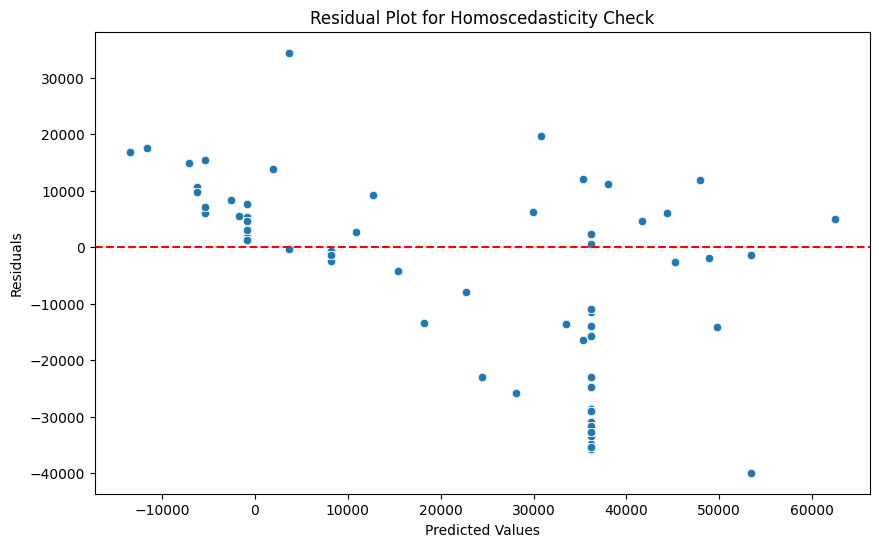

Breusch-Pagan Test for Homoscedasticity:

Lagrange Multiplier statistic   51421.22
p-value (LM)                        0.00
F-statistic                     54072.80
p-value (F)                         0.00
dtype: float64

Interpretation:
p-value ≤ 0.05: Evidence of heteroscedasticity detected. The homoscedasticity assumption may be violated.


In [116]:
homoscedasticity_plot(best_model)

breusch_pagan_test(best_model)

Note: Despite a good R-squared value (0.779), the residuals show evidence of heteroscedasticity, indicating a violation of the constant variance assumption.

### Summary

- We found out that the best simple linear regression (SLR) model explains the relationship between `Visitors_country_GDP` and `Visitors_country_idv` with an R-squared value of 0.779, indicating that 77.9% of the variation in GDP is explained by individualism scores (IDV). This is a strong relationship, suggesting that countries with higher individualism scores tend to have higher GDP.

- The regression coefficient of 903.02 implies that for every 1-unit increase in IDV, the GDP increases by approximately $903 per capita, holding other factors constant. The very small F-statistic and p-value of 0 confirm that the relationship is statistically significant. 

- Compared to the previous SLR model (`Overall_rating` ~ `Service_rating`, R² = 0.525), this new model has a substantially better fit (R² increased from 52.5% to 77.9%). This suggests that economic and cultural factors have a stronger linear relationship than customer satisfaction metrics in the previous model. 

- However, while this model performs better in explaining GDP variation, log-likelihood (-1.1182e+07), AIC (2.236e+07), and BIC (2.236e+07) indicate that there may still be missing explanatory variables. Factors such as technological advancement, political stability, or education levels could further improve the model's predictive accuracy. Additionally, the Durbin-Watson statistic (0.000) suggests potential autocorrelation, which may indicate that time-series or regional effects are influencing the data.

## Multiple Linear Regression (MLR)

In [118]:
# MLR using only significant columns
formula_mlr = "Overall_rating ~ " + " + ".join(significant_columns)

# Fit the model
model_mlr = smf.ols(formula=formula_mlr, data=transformed_df).fit()

# Print the model summary
print("\nMLR Model Summary:")
print(model_mlr.summary())


MLR Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Overall_rating   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                 3.119e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:08:15   Log-Likelihood:            -2.9752e+06
No. Observations:             1048575   AIC:                         5.951e+06
Df Residuals:                 1048505   BIC:                         5.951e+06
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

We still use over 60 features, which might indicate strong multicollinearity. Let's see if removing strong correlations between variables might help our MLR model perform better.

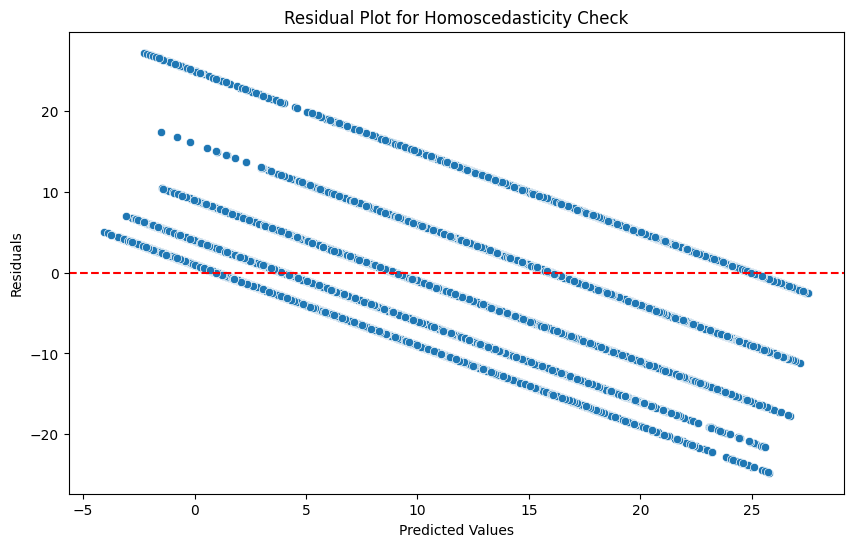

Breusch-Pagan Test for Homoscedasticity:

Lagrange Multiplier statistic   109695.15
p-value (LM)                         0.00
F-statistic                       1775.41
p-value (F)                          0.00
dtype: float64

Interpretation:
p-value ≤ 0.05: Evidence of heteroscedasticity detected. The homoscedasticity assumption may be violated.


In [ ]:
# # Homoscedasticity
homoscedasticity_plot(model_mlr)

breusch_pagan_test(model_mlr)

Note: 
The multiple linear regression model built to predict Overall_rating using several significant features achieves a relatively high R-squared value of 0.672, suggesting a good overall model fit. Most predictors are statistically significant with p-values close to 0, meaning they contribute meaningfully to the prediction of the target variable. <br>
However, the Breusch–Pagan test for homoscedasticity returns a p-value of 0.00, indicating strong evidence against the null hypothesis of constant variance in residuals. This suggests the presence of heteroscedasticity, which violates one of the key assumptions of linear regression.

In [128]:
# MLR using high correlation filtered columns 
highc_filtered_df.columns = highc_filtered_df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Removes non-alphanumeric characters
encoded_df.columns = encoded_df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Removes non-alphanumeric characters

formula_mlr = "Overall_rating ~ " + " + ".join(highc_filtered_df.columns)

# Fit the model
model_mlr_h = smf.ols(formula=formula_mlr, data=encoded_df).fit()

# Print the model summary
print("\nMLR Model Summary:")
print(model_mlr_h.summary())


MLR Model Summary:
                            OLS Regression Results                            
Dep. Variable:         Overall_rating   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2667.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:08:03   Log-Likelihood:                -5540.5
No. Observations:             1048575   AIC:                         1.114e+04
Df Residuals:                 1048547   BIC:                         1.147e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

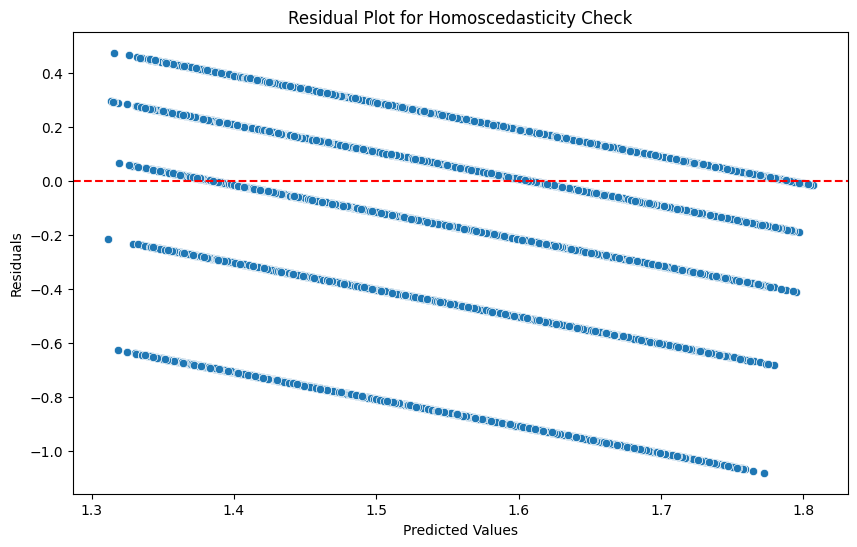

Breusch-Pagan Test for Homoscedasticity:

Lagrange Multiplier statistic   26612.34
p-value (LM)                        0.00
F-statistic                      1011.28
p-value (F)                         0.00
dtype: float64

Interpretation:
p-value ≤ 0.05: Evidence of heteroscedasticity detected. The homoscedasticity assumption may be violated.


In [129]:
# Homoscedasticity
homoscedasticity_plot(model_mlr_h)
breusch_pagan_test(model_mlr_h)

Note: the residual plot displays a clear striped pattern, and the Breusch–Pagan test reports a p-value of 0.00, providing strong evidence of heteroscedasticity. This violates the homoscedasticity assumption of linear regression, meaning that the variance of residuals is not constant across all levels of predicted values.

Although we are using only the features after filtered by the high correlations, the r-squared is very low. By changing the target variable we can try to improve the model.

In [121]:
correlation_sums = {}
top_6_features = {}

# Loop through each column to use it as the target variable
for target_variable in highc_filtered_df.columns:
    # Calculate the absolute correlations of the target variable with all other variables
    correlations_with_target = highc_filtered_df.corr()[target_variable].abs().sort_values(ascending=False)
    
    # Exclude the target variable itself (i.e., correlation of the target variable with itself)
    correlations_with_target = correlations_with_target[correlations_with_target.index != target_variable]
    
    # Sum the top 6 highest absolute correlations
    top_6_correlations = correlations_with_target.head(6)
    correlation_sum = top_6_correlations.sum()
    
    # Store the sum and top 6 features for this target variable
    correlation_sums[target_variable] = correlation_sum
    top_6_features[target_variable] = top_6_correlations.index.tolist()

# Find the target variable with the highest sum of correlations
best_target = max(correlation_sums, key=correlation_sums.get)

# Get the top 6 features for the best target
best_top_6_features = top_6_features[best_target]

# Print the best target and its correlation sum along with the top 6 features
print(f"The best target variable is '{best_target}' with a sum of top 6 absolute correlations: {correlation_sums[best_target]}")
print(f"Top 6 correlated features for the best target variable: {best_top_6_features}")

# To remove features with low correlation, simply keep the ones in the best_top_6_features list
features_to_keep = best_top_6_features
features_to_remove = [col for col in highc_filtered_df.columns if col not in features_to_keep]

print(f"Features to keep: {features_to_keep}")
print(f"Features to remove: {features_to_remove}")

The best target variable is 'Hotelstars' with a sum of top 6 absolute correlations: 2.432207213458576
Top 6 correlated features for the best target variable: ['BusinessCentrewithInternetAccess', 'Hotelnoofrooms', 'Babysitting', 'Concierge', 'Wheelchairaccess', 'DryCleaning']
Features to keep: ['BusinessCentrewithInternetAccess', 'Hotelnoofrooms', 'Babysitting', 'Concierge', 'Wheelchairaccess', 'DryCleaning']
Features to remove: ['Destination_country_id', 'Visitors_country_id', 'Hotelstars', 'FamilyRooms', 'AirConditioning', 'SelfServeLaundry', 'MultilingualStaff', 'FreeBreakfast', 'NonSmokingHotel', 'Destination_country_GDP', 'Visitors_country_GDP', 'Destination_country_mas', 'Destination_country_uai', 'Destination_country_lto', 'Destination_country_ivr', 'Visitors_country_mas', 'Visitors_country_uai', 'Visitors_country_lto', 'Trip_type_couple', 'Reviewer_rank', 'Date_of_review']


In [124]:
## MLR using the best target variable
encoded_df.columns = encoded_df.columns.str.replace(r'[^\w\s]', '', regex=True)  # Removes non-alphanumeric characters

formula_mlr = "Hotelstars ~ " + " + ".join(best_top_6_features)

# Fit the model
model_mlr = smf.ols(formula=formula_mlr, data=encoded_df).fit()

# Print the model summary
print("\nMLR Model Summary:")
print(model_mlr.summary())


MLR Model Summary:
                            OLS Regression Results                            
Dep. Variable:             Hotelstars   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                 1.221e+05
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:15:48   Log-Likelihood:            -1.2101e+06
No. Observations:             1048575   AIC:                         2.420e+06
Df Residuals:                 1048568   BIC:                         2.420e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

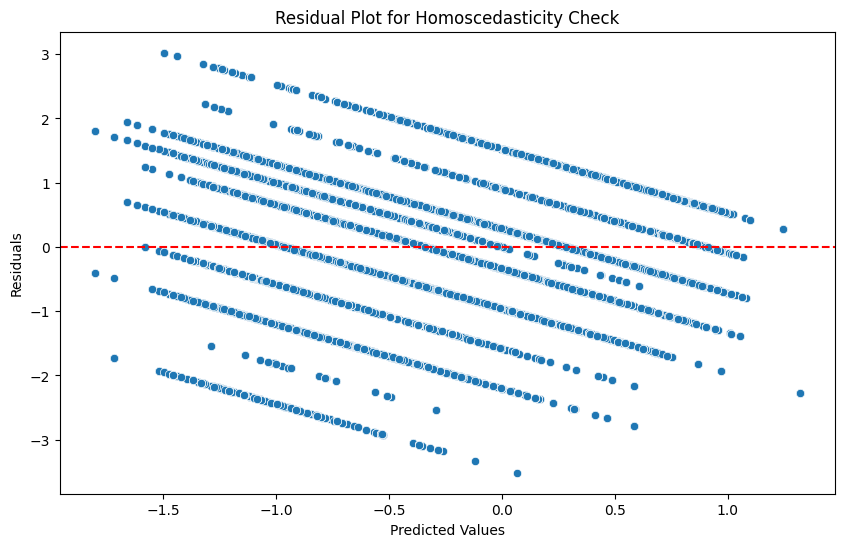

Breusch-Pagan Test for Homoscedasticity:

Lagrange Multiplier statistic   31102.19
p-value (LM)                        0.00
F-statistic                      5342.12
p-value (F)                         0.00
dtype: float64

Interpretation:
p-value ≤ 0.05: Evidence of heteroscedasticity detected. The homoscedasticity assumption may be violated.


In [125]:
homoscedasticity_plot(model_mlr)

breusch_pagan_test(model_mlr)

Note: The residual plot shows a clear banded, downward pattern, suggesting heteroscedasticity. This is confirmed by the Breusch–Pagan test, which reports a p-value of 0.00, leading to the rejection of the null hypothesis of constant variance. Thus, the model violates the homoscedasticity assumption of linear regression.

### Summary



This project explored multiple linear regression (MLR) models to predict various target variables such as Overall_rating, Visitors_country_GDP, and Hotelstars, using different sets of features selected by significance and correlation. While some models, particularly the simple regression for Visitors_country_GDP (R² = 0.779) and the refined MLR model for Hotelstars (R² = 0.411), demonstrated acceptable explanatory power, all models consistently failed the assumption of homoscedasticity. Residual plots revealed clear non-constant variance patterns, and the Breusch–Pagan tests returned p-values close to 0, confirming the presence of heteroscedasticity. Moreover, evidence of multicollinearity appeared in models with a high condition number. These violations of regression assumptions suggest that while the models are statistically significant, their reliability is limited. To improve model robustness and inference validity, it is recommended to use heteroscedasticity-robust standard errors, perform multicollinearity diagnostics (e.g., VIF), or consider alternative modeling approaches such as regularized regression or tree-based methods.